# The Battle of the Neighborhoods

## Part 1: New York city geographical coordinates dataset

### To segement the neighborhoods and explore them, we will essentially need a dataset that contains boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood

### Dataset utilised from: https://geo.nyu.edu/catalog/nyu_2451_34572

#### Download all the dependencies that we will need

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import csv # implements classes to read and write tabular data in CSV form

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

Run a wget command and access the data

In [2]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


#### Load and explore the data

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

The relevant data is in the features key, which is basically a list of the neighborhoods. So, define a new variable that includes this data.

In [4]:
neighborhoods_data = newyork_data['features']

In [5]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a pandas dataframe

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Loop through the data and fill the dataframe one row at a time

In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [10]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [12]:
neighborhoods.to_csv('BON1_NYC_GEO.csv',index=False)

#### The above result shows that there are 306 different Neighborhoods in New York.


Now let create a BAR PLOT to show different Neighborhoods in New York.

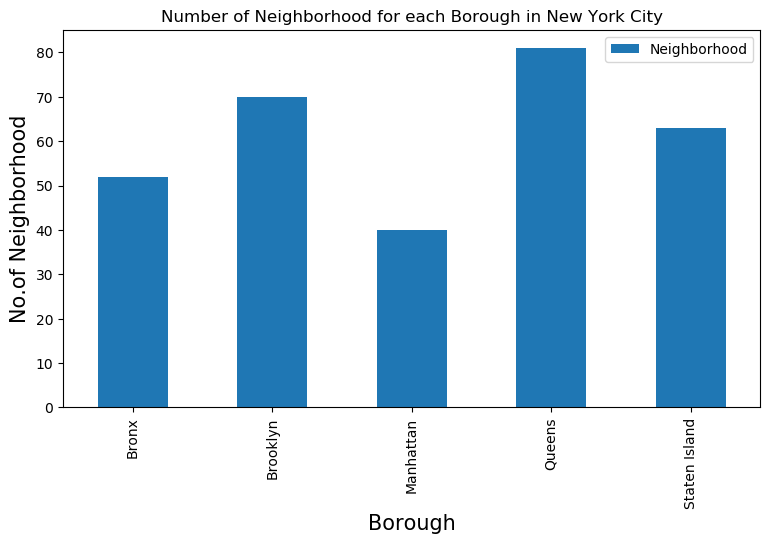

In [58]:

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
neighborhoods.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Use geopy library to get the latitude and longitude values of New York City

In [14]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top

In [15]:
# create map of New York using latitude and longitude values
map_NewYork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork

## Part 2: Population of New York city

### Web scrapping of Population data from wikipedia page - https://en.wikipedia.org/wiki/New_York_City

Download the dependencies

In [16]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# conda install -c anaconda beautiful-soup --yes
from bs4 import BeautifulSoup # package for parsing HTML and XML documents

import csv # implements classes to read and write tabular data in CSV form

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


#### Web scrapping of Population data from wikipedia page using BeautifulSoup

In [17]:
website_url = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table',{'class':'wikitable sortable'})
#print(soup.prettify())

headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('BON2_POPULATION1.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

#### Load data from CSV

In [19]:
Pop_data=pd.read_csv('BON2_POPULATION1.csv')
Pop_data.drop(Pop_data.columns[[7,8,9,10,11]], axis=1,inplace=True)
print('Data downloaded!')

Data downloaded!


In [20]:
Pop_data = Pop_data.fillna('')
Pop_data

,New York City's five boroughsvte,Jurisdiction,Population,Gross Domestic Product,Land area,Density,Borough,squarekm,persons / sq. mi,persons /km2
0,The Bronx\n,\n Bronx\n,"1,432,132\n",42.695\n,"29,200\n",42.10\n,109.04\n,,,
1,Brooklyn\n,\n Kings\n,"2,582,830\n",91.559\n,"34,600\n",70.82\n,183.42\n,,,
2,Manhattan\n,\n New York\n,"1,628,701\n",600.244\n,"360,900\n",22.83\n,59.13\n,,,
3,Queens\n,\n Queens\n,"2,278,906\n",93.310\n,"39,600\n",108.53\n,281.09\n,,,
4,Staten Island\n,\n Richmond\n,"476,179\n",14.514\n,"30,300\n",58.37\n,151.18\n,,,
5,City of New York,"8,398,748",842.343,"97,700",302.64,783.83,"28,188",,,
6,State of New York,"19,745,289","1,701.399","85,700","47,214","122,284",416.4,,,
7,Sources:[14] and see individual borough articl...,,,,,,,,,


## Part-3: Segmenting Neighborhoods - Brooklyn and Manhattan

#### In this section of the capstone project, we will use the Foursquare API to explore neighborhoods in Brooklyn and Manhattan. We will use the explore function to get the most common venue categories in each neighborhood

#### Load and explore the data

In [63]:
NYC_Geo=pd.read_csv('BON1_NYC_GEO.csv')
print('Data downloaded!')

Data downloaded!


In [64]:
NYC_Geo.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [65]:
NYC_Geo['Borough'].value_counts().to_frame()

,Borough
Queens,81
Brooklyn,70
Staten Island,63
Bronx,52
Manhattan,40


In [66]:
NYC_Geo.shape

(306, 4)

In [67]:
print(NYC_Geo.Borough.unique())

['Bronx' 'Manhattan' 'Brooklyn' 'Queens' 'Staten Island']


In [68]:
NYC_Geo.isnull().sum()

Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

#### Segmenting Neighborhoods - Brooklyn and Manhattan

In [69]:
BM_Geo = NYC_Geo.loc[(NYC_Geo['Borough'] == 'Brooklyn')|(NYC_Geo['Borough'] == 'Manhattan')]
BM_Geo = BM_Geo.reset_index(drop=True)
BM_Geo.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Brooklyn,Bay Ridge,40.625801,-74.030621
2,Brooklyn,Bensonhurst,40.611009,-73.995180
3,Brooklyn,Sunset Park,40.645103,-74.010316
4,Brooklyn,Greenpoint,40.730201,-73.954241


In [70]:
BM_Geo.shape

(110, 4)

#### Use geopy library to get the latitude and longitude values of New York City. The geograpical coordinate of New York City are 40.7308619, -73.9871558

In [71]:
import time
start_time = time.time()

address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

print("--- %s seconds ---" % round((time.time() - start_time), 2))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.
--- 0.34 seconds ---


#### Create a map of Brooklyn and Manhattan with neighborhoods superimposed on top

In [72]:
# create map of New York using latitude and longitude values
map_BM = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(BM_Geo['Latitude'], BM_Geo['Longitude'], BM_Geo['Borough'], BM_Geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BM)  
    
map_BM

#### Define Foursquare Credentials and Version

In [73]:
CLIENT_ID = 'OLN1BAQQBHO234LKFIU1ZNGV4Z3O3P1GS5KIMTNPJHLX1MKL' # your Foursquare ID
CLIENT_SECRET = 'VDM5CGGVSUOGKMY21ETO4J1UAJH5QJEALQCJAIWUF2DJXR2T' # your Foursquare Secret
VERSION = '20181218' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OLN1BAQQBHO234LKFIU1ZNGV4Z3O3P1GS5KIMTNPJHLX1MKL
CLIENT_SECRET:VDM5CGGVSUOGKMY21ETO4J1UAJH5QJEALQCJAIWUF2DJXR2T


### Explore Neighborhoods in Brooklyn and Manhattan

#### Extract Venues data for each neighborhoods in Brooklyn

In [74]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT=200, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [90]:
#### Run the above function on each neighborhood and create a new dataframe called BM_venues.

In [75]:
BM_venues = getNearbyVenues(names=BM_Geo['Neighborhood'],
                                  latitudes=BM_Geo['Latitude'],
                                  longitudes=BM_Geo['Longitude'],
                                  LIMIT=200)

print('The "BM_venues" dataframe has {} venues and {} unique venue types.'.format(
      len(BM_venues['Venue Category']),
      len(BM_venues['Venue Category'].unique())))

BM_venues.to_csv('BM_venues.csv', sep=',', encoding='UTF8')
BM_venues.head()

Marble Hill
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


#### Download data from BM_venues.csv

In [76]:
colnames = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
BM_venues = pd.read_csv('BM_venues.csv', skiprows=1, names=colnames)
BM_venues.columns = BM_venues.columns.str.replace(' ', '')
BM_venues.head()

,Neighborhood,NeighborhoodLatitude,NeighborhoodLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [77]:
BM_venues.shape

(9669, 7)

#### Visualize the BM_Venues data

In [ ]:
def Venues_Map(Borough_name, Borough_neighborhoods):
    
    # Use geopy library to get the latitude and longitude values 
    geolocator = Nominatim(user_agent="Jupyter")
    Borough_location = geolocator.geocode(Borough_name) #'Brooklyn, NY'
    Borough_latitude = Borough_location.latitude
    Borough_longitude = Borough_location.longitude
    print('The geographical coordinates of "{}" are {}, {}.'.format(Borough_name, Borough_latitude, Borough_longitude))
    
    # To verify the number of Boroughs and Neighborhoods in the extracted data
    print('The "{}" dataframe has {} different venue types and {} neighborhoods.'.format(
          Borough_name,
          len(Borough_neighborhoods['VenueCategory'].unique()),
          len(Borough_neighborhoods['Neighborhood'].unique())))
    
    # create map of city using latitude and longitude values
    map_Borough = folium.Map(location=[Borough_latitude, Borough_longitude], zoom_start=10)

    # add markers to map
    for lat, lng, venue, category in zip(Borough_neighborhoods['VenueLatitude'], Borough_neighborhoods['VenueLongitude'], Borough_neighborhoods['Venue'], Borough_neighborhoods['VenueCategory']):
        label = '{}, {}'.format(category, venue)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=0.1,
            popup=label,
            color='red',
            fill=True,
            fill_color='#FF0000',
            fill_opacity=0.3).add_to(map_Borough)  

    return map_Borough

In [81]:
BM_venues.groupby('VenueCategory')['Venue'].count().sort_values(ascending=False)

VenueCategory
Pizza Place                                 394
Coffee Shop                                 347
Italian Restaurant                          241
Park                                        240
Bakery                                      236
Bar                                         220
Café                                        219
Grocery Store                               197
American Restaurant                         164
Mexican Restaurant                          149
Sandwich Place                              145
Gym                                         144
Deli / Bodega                               138
Caribbean Restaurant                        137
Ice Cream Shop                              137
Chinese Restaurant                          136
Gym / Fitness Center                        136
Cocktail Bar                                135
Wine Shop                                   127
Yoga Studio                                 118
Donut Shop                

In [83]:
BM_venues.groupby('VenueCategory')['Venue'].count().sort_values(ascending=False)
BM_venues.head(50)

,Neighborhood,NeighborhoodLatitude,NeighborhoodLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
5,Marble Hill,40.876551,-73.91066,El Malecon,40.879338,-73.904457,Caribbean Restaurant
6,Marble Hill,40.876551,-73.91066,Baker Athletic Complex,40.872061,-73.914876,Athletics & Sports
7,Marble Hill,40.876551,-73.91066,The Bronx Public,40.878377,-73.903481,Pub
8,Marble Hill,40.876551,-73.91066,Estrellita Poblana V,40.879687,-73.906257,Mexican Restaurant
9,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [87]:
# one hot encoding
BM_onehot = pd.get_dummies(BM_venues[['VenueCategory']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['Neighborhood'] + list(BM_onehot.columns)

# add neighborhood column back to dataframe
BM_onehot['Neighborhood'] = BM_venues['Neighborhood'] 

# move neighborhood column to the first column
BM_onehot = BM_onehot[column_names]

BM_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Arts Building,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cruise,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Kofte Place,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Outlet Store,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,

In [88]:
restaurant_List = []
search = 'Restaurant'
for i in BM_onehot.columns :
    if search in i:
        restaurant_List.append(i)

In [89]:
restaurant_List

['African Restaurant',
 'American Restaurant',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Austrian Restaurant',
 'Burmese Restaurant',
 'Cajun / Creole Restaurant',
 'Cambodian Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Caucasian Restaurant',
 'Chinese Restaurant',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Cuban Restaurant',
 'Czech Restaurant',
 'Dim Sum Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Empanada Restaurant',
 'English Restaurant',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'French Restaurant',
 'German Restaurant',
 'Greek Restaurant',
 'Halal Restaurant',
 'Hawaiian Restaurant',
 'Hotpot Restaurant',
 'Indian Restaurant',
 'Israeli Restaurant',
 'Italian Restaurant',
 'Japanese Curry Restaurant',
 'Japanese Restaurant',
 'Jewish Restaurant',
 'Kebab Restaurant',
 'Korean Restaurant',
 'Kosher Restaurant',

#### The above list and earlier map can be utilized as a preliminary dats to identify location to initiate the restaurant business, as this axercise was done for a training program please be cautious while considering in any kind of deicision

## Thank You